In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
plt.rcParams.update({'font.size': 22})
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data=pd.read_csv('/content/drive/My Drive/arima/trainandtest/NH3CPCBtrain - NH3-_2_CPCB - NH3-_2_ (1) - NH3-_2_CPCB - NH3-_2_ (1) (2).csv')
data.shape

(503, 2)

In [5]:
data['DATE']=pd.to_datetime(data['DATE'], infer_datetime_format=True)
data=data.set_index(['DATE'])
data.head()

,NH3(CPCB)
DATE,
2020-04-08 08:30:00,9.00
2020-04-08 08:45:00,9.10
2020-04-08 09:00:00,9.00
2020-04-08 09:15:00,6.99
2020-04-08 09:30:00,9.20


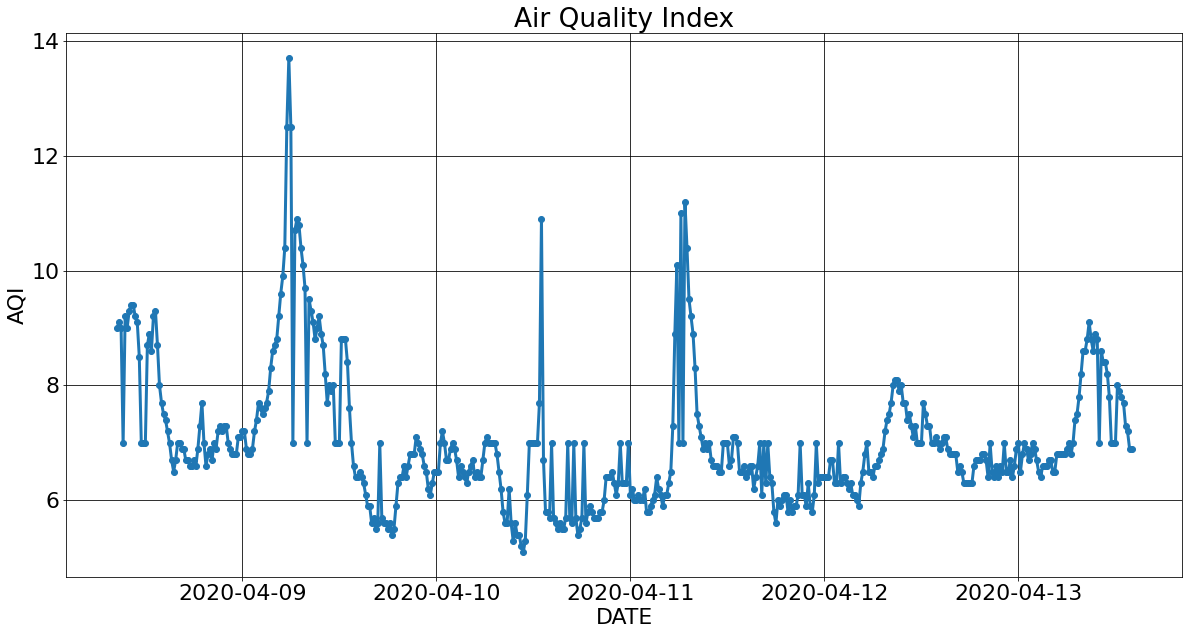

In [6]:
plt.figure(figsize=(20,10))
plt.xlabel("DATE")
plt.ylabel("AQI")
plt.title('Air Quality Index')

plt.plot(data, marker='o', label='Air Quality Index', linewidth=3)
plt.grid(color='black')

In [7]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(data['NH3(CPCB)'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic           -4.324508
p-value                   0.000403
Lags Used                 8.000000
No. of Obs              494.000000
Critical Value (1%)      -3.443657
Critical Value (5%)      -2.867408
Critical Value (10%)     -2.569896
dtype: float64


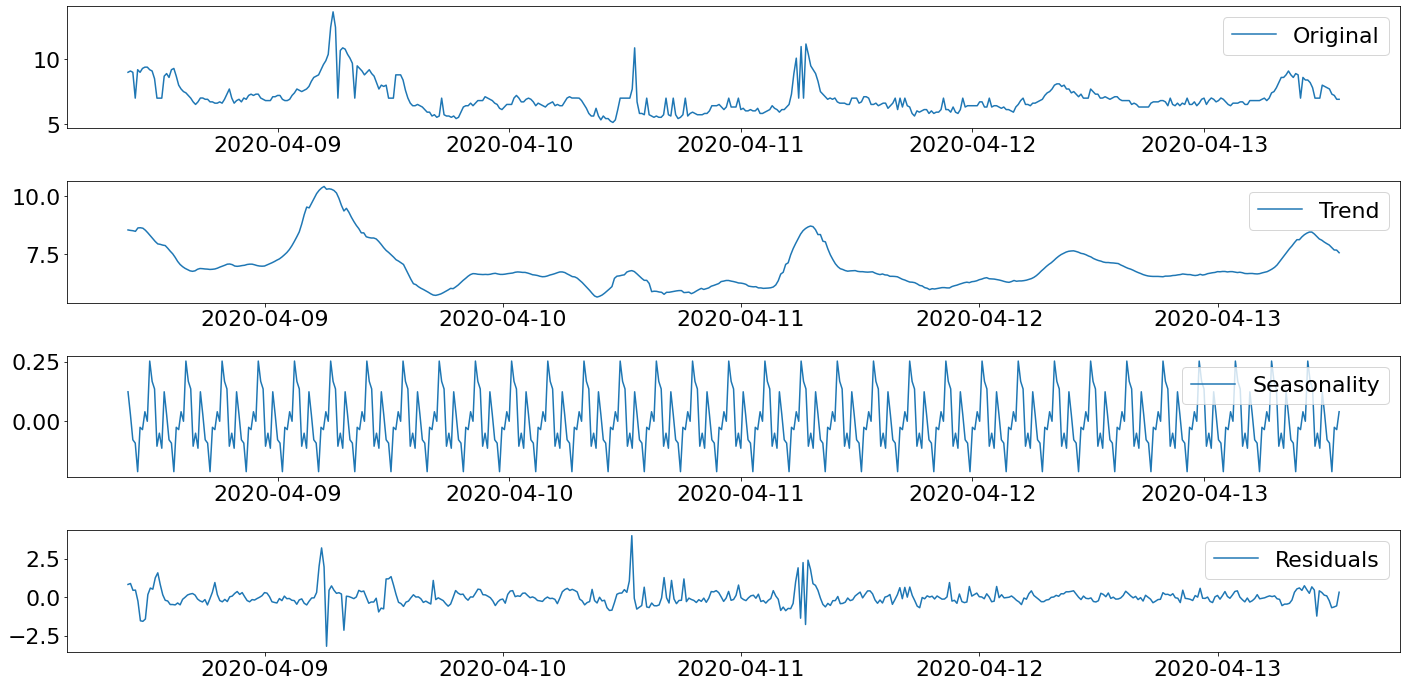

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data,freq=15)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid
plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(data, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

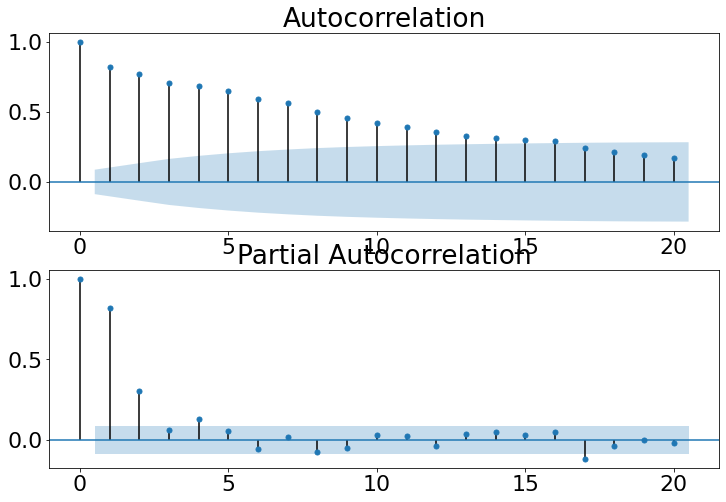

In [9]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data,lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data,lags=20,ax=ax2)





/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


plotting ARIMA model


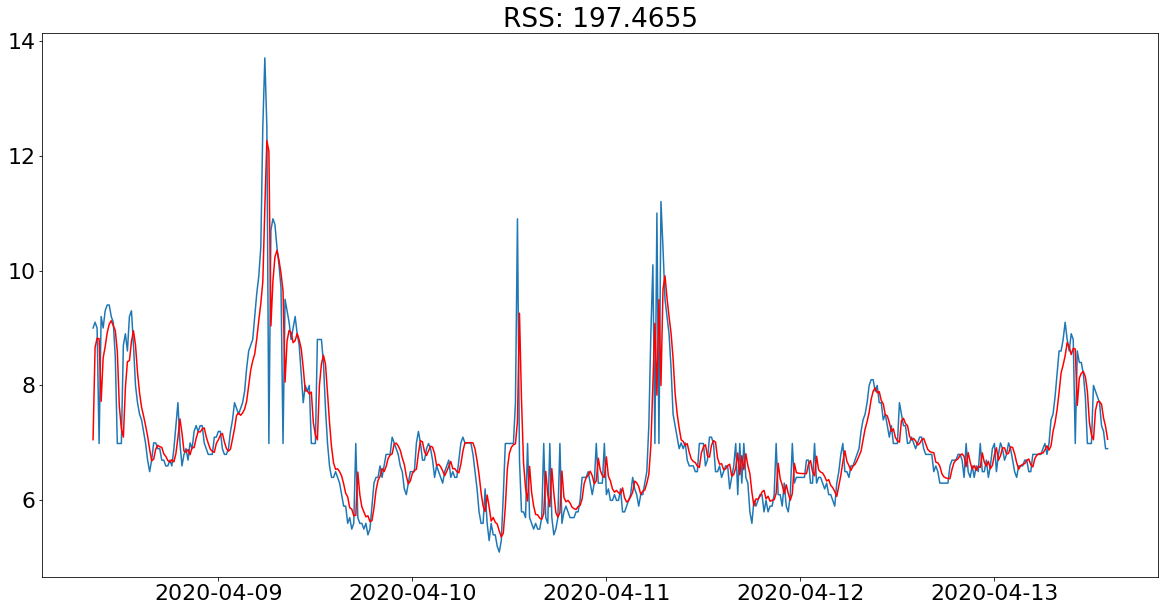

In [14]:
from statsmodels.tsa.arima_model import ARIMA
plt.figure(figsize=(20,10))
model=ARIMA(data, order=(1,0,1))
results=model.fit(disp=-1)
plt.plot(data)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data['NH3(CPCB)'])**2))
print('plotting ARIMA model')

In [15]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

DATE
2020-04-08 08:30:00    7.056755
2020-04-08 08:45:00    8.662488
2020-04-08 09:00:00    8.820870
2020-04-08 09:15:00    8.813520
2020-04-08 09:30:00    7.723417
dtype: float64


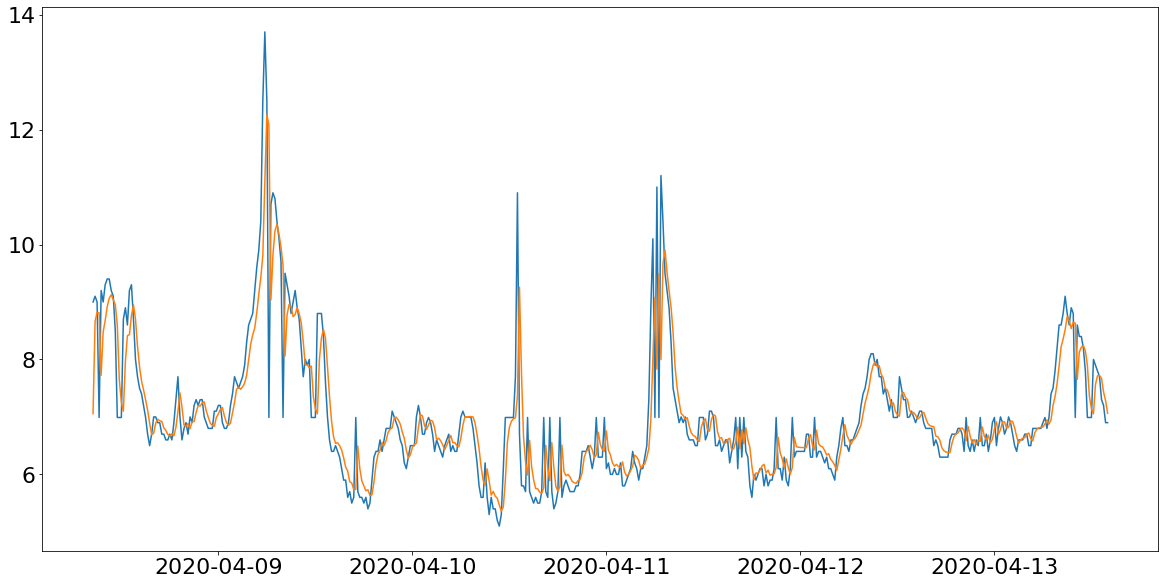

In [16]:
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


Text(0.5, 1.0, 'Forecasting of Air Quality Index')

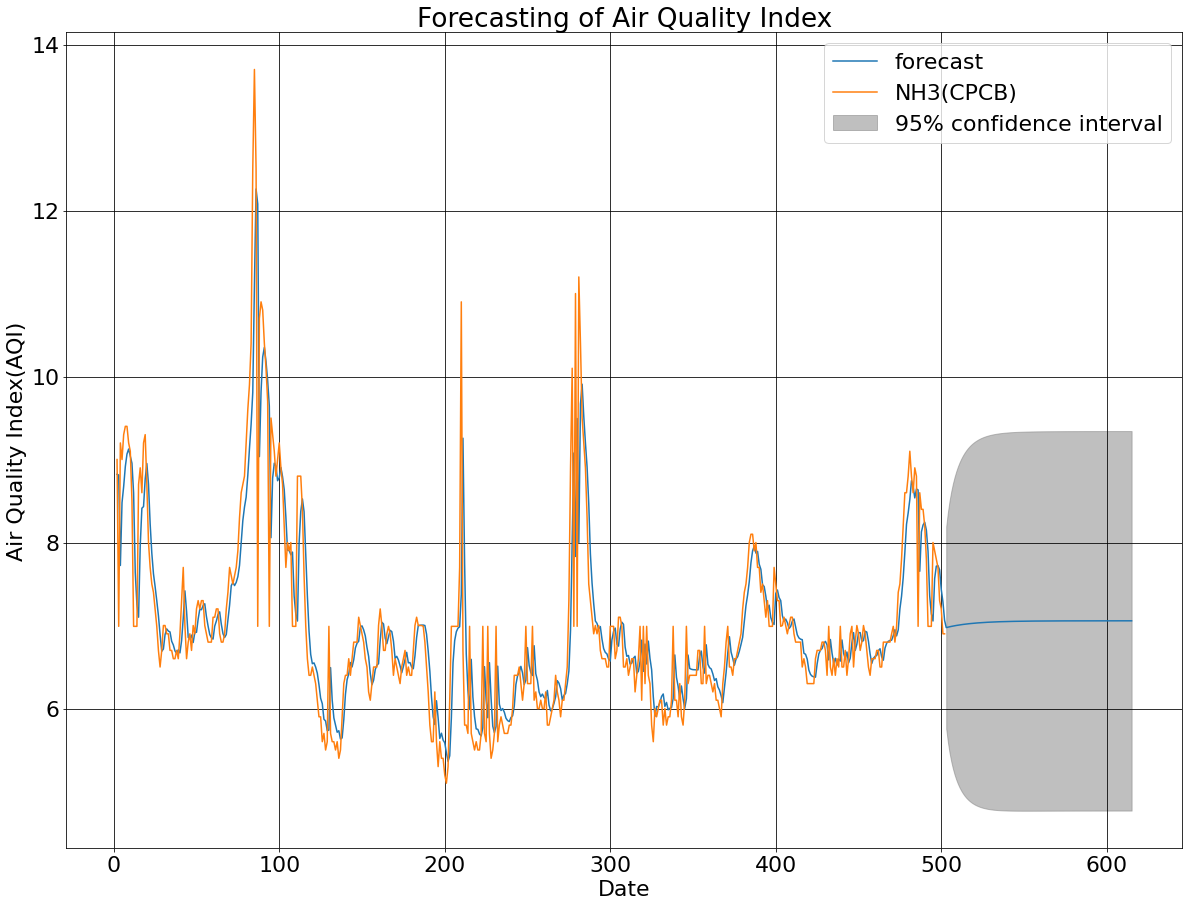

In [20]:
rcParams['figure.figsize']=20,15
results.plot_predict(2,615)
x=results.forecast(steps=15)
plt.grid(color='black')
plt.xlabel("Date")
plt.ylabel("Air Quality Index(AQI)")
plt.title('Forecasting of Air Quality Index')

In [21]:
x=results.forecast(steps=15)[0]
print(x)

[6.97507156 6.9799396  6.98451752 6.98882262 6.99287115 6.99667841
 7.00025876 7.00362574 7.00679206 7.00976968 7.01256985 7.01520313
 7.01767948 7.02000825 7.02219824]


In [23]:
df1 = pd.read_csv(r'/content/drive/My Drive/arima/trainandtest/NH3CPCBTEST - Sheet1.csv')
x = results.forecast(steps=15)[0]
df1 ['Predicted'] = x
df1.to_csv(r'/content/drive/My Drive/arima/trainandtest/NH3CPCBTEST - Sheet1.csv', index = False)

In [24]:
df1

,DATE,NH3(CPCB),Predicted
0,2020-04-13 14:15:03,7.0,6.975072
1,2020-04-13 14:30:03,6.9,6.979940
2,2020-04-13 14:45:03,6.8,6.984518
3,2020-04-13 15:00:03,6.8,6.988823
4,2020-04-13 15:15:03,6.6,6.992871
5,2020-04-13 15:30:03,6.6,6.996678
6,2020-04-13 15:45:03,6.6,7.000259
7,2020-04-13 16:00:03,6.6,7.003626
8,2020-04-13 16:15:03,6.4,7.006792
9,2020-04-13 16:30:03,6.3,7.009770


In [25]:
df1['DATE']=pd.to_datetime(df1['DATE'], infer_datetime_format=True)
df1=df1.set_index(['DATE'])
df1.head()

,NH3(CPCB),Predicted
DATE,,
2020-04-13 14:15:03,7.0,6.975072
2020-04-13 14:30:03,6.9,6.979940
2020-04-13 14:45:03,6.8,6.984518
2020-04-13 15:00:03,6.8,6.988823
2020-04-13 15:15:03,6.6,6.992871


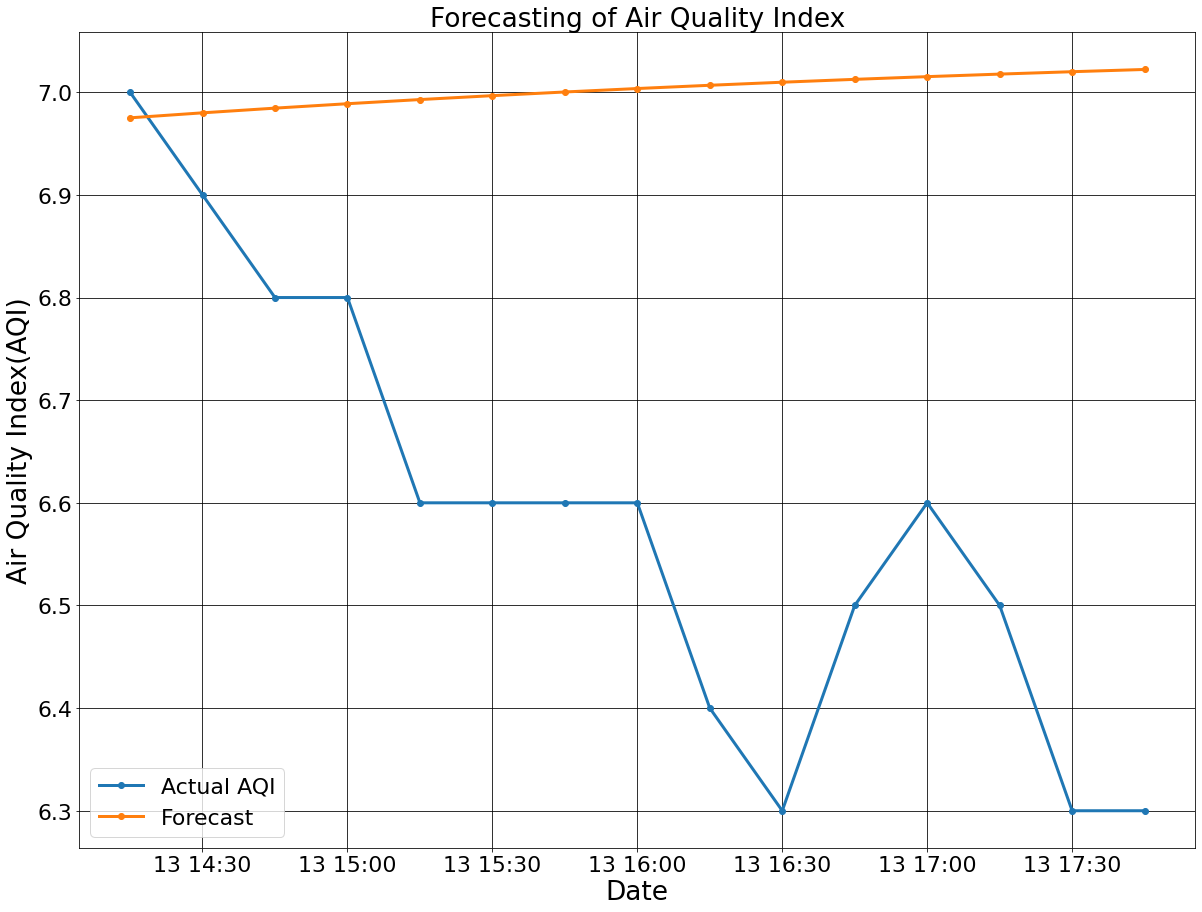

In [28]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,15))
import matplotlib.dates as mdates
import datetime as dt
t = mdates.drange(dt.datetime(2020, 4, 24), dt.datetime(2020, 4, 29),
                  dt.timedelta(hours=24))
independent_variables = ['NH3(CPCB)', 'Predicted']
y = df1[independent_variables] 
plt.plot(y, marker='o', linewidth=3)
#plt.plot(y, marker='o', label='Air Quality Index', linewidth=3)
plt.xlabel("Date", fontsize='large')
plt.ylabel("Air Quality Index(AQI)",fontsize='large')
plt.title('Forecasting of Air Quality Index',fontsize='large')
plt.legend(['Actual AQI', 'Forecast'])
plt.grid(color='black')
# plt.axvspan(*mdates.datestr2num(['2020/04/17', '2020/04/30']), color='grey', alpha=0.5)
plt.show()

In [34]:
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error
df1['SST'] = np.square(df1['NH3(CPCB)'] - df1['Predicted'].mean())
df1['SSR'] = np.square(df1['Predicted'] - df1['NH3(CPCB)'].mean())
print("Sum of SSR:", df1['SSR'].sum())
print ("Sum of SST:", df1['SST'].sum())
print ("R Squared : ", df1['SSR'].sum() / df1['SST'].sum())
print ("Mean Absolute Error: ", mean_absolute_error(df1['NH3(CPCB)'],df1['Predicted']))
print ("Root Mean Squared Error: ", np.sqrt(mean_squared_error(df1['NH3(CPCB)'],df1['Predicted'])))

Sum of SSR: 2.5873649380315773
Sum of SST: 3.241543433612652
R Squared :  0.798189193210346
Mean Absolute Error:  0.41839086318210217
Root Mean Squared Error:  0.4709281691853711
